# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup posts on a variety of topics. You'll train classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction may be useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on Slack, but <b> please prepare your own write-up with your own code. </b>

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)


training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [3]:
#def P1(num_examples=5):
    ### STUDENT START ###
    
# 1. Print text from 5 training examples and the associated label
# for each text example, t, and label, l   
for t, l in zip(train_data[:5], train_labels[:5]):
    # print a separator 
    print("-"* 80)
    # print data example and label
    print("-","Label: {0}"\
          .format(newsgroups_train.target_names[l]),
          "\n\n",
          t)
    ### STUDENT END ###

#P1(5)

--------------------------------------------------------------------------------
- Label: comp.graphics 

 Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
--------------------------------------------------------------------------------
- Label: talk.religion.misc 

 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children

### Part 2:

Transform the training data into a matrix of word unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?
Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method.

Now transform the training data into a matrix of word unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?
Use `CountVectorization(vocabulary=...)` and its `.transform` method.

Now transform the training data into a matrix of character bigram and trigram feature vectors.  What is the size of the vocabulary?
Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method.

Now transform the training data into a matrix of word unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?
Use `CountVectorization(min_df=...)` and its `.fit_transform` method.

Now again transform the training data into a matrix of word unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?
Hint: Build vocabularies for both train and dev and look at the size of the difference.

Notes:
* `.fit_transform` makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").
* `.fit_transform` and `.transform` return sparse matrix objects.  See about them at http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. 

In [4]:
#def P2():
    ### STUDENT START ###
    
##############################
# 1. Transform the training data into a matrix of word unigram feature vectors
print("-"*80,"\n","Transform the training data into a matrix of word unigram feature vectors")
# Convert text documents to a matrix of token counts with sparse representation
CountVect = CountVectorizer()
# Learn the vocabulary dictionary and return term-document matrix.
FeatureVectors = CountVect.fit_transform(train_data)
# Tokenize vocabulary
TrainTokens = CountVect.fit(train_data)
# Vocabulary size
print("\n - The vocabulary is comprised of {0} words".\
     format(len(TrainTokens.vocabulary_))) # or FeatureVectors.shape[1]

# 2. What is the average number of non-zero features per example?
print('\n - The average number of non-zero features per example is {0:.2f}.'.\
    format(FeatureVectors.nnz / float(np.array(train_data).shape[0])))

# Sanity checks
len(np.nonzero(FeatureVectors)[0]) / float(len(train_data)) ==\
    FeatureVectors.nnz / float(len(train_data)) ==\
    np.array([FeatureVectors[i].nnz for i in range(len(train_data))]).mean()


# 3. What is the fraction of the non-zero entries in the matrix?
print('\n - The fraction of non-zero entries across the matrix is {0:.2f}%'.\
        format(100*float(FeatureVectors.nnz) / (FeatureVectors.shape[0] *
                                                 FeatureVectors.shape[1])))

# 4. What are the 0th and last feature strings (in alphabetical order)?
# Grab strings
FeatureStrings = CountVect.get_feature_names()
# Sort strings
FeatureStrings.sort()
# Print 1st/0th feature string
print('\n - The 0th feature string is "{0}"'.format(FeatureStrings[0]))
# Print last feature string
print('\n - The last feature string is "{0}"'.format(FeatureStrings[-1]))

##############################
# 5. Transform the training data into a matrix of word unigram feature vectors
# using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].

# Print delineator
print("-"*80,"\n","Transform training data into a matrix of word unigram feature vectors\
 using your own vocabulary with these 4 words")
# Own vocabulary
OwnVocab = ["atheism", "graphics", "space", "religion"]
# Convert text documents to a matrix of token counts with sparse representation
OwnVocab_CountVect = CountVectorizer(vocabulary=OwnVocab)
# Transform documents to document-term matrix.
FeatureVectors_OwnVocab = OwnVocab_CountVect.transform(raw_documents=train_data)
# Tokenize vocabulary
TrainTokens_OwnVocab = OwnVocab_CountVect.fit(train_data)
# Confirm the size of the vocabulary
print("\n - The vocabulary is now comprised of {0} words".\
     format(len(TrainTokens_OwnVocab.vocabulary_)))
# What is the average number of non-zero features per example?
print('\n - The average number of non-zero features per example is now {0:.2f}.'.\
    format(FeatureVectors_OwnVocab.nnz / float(len(train_data))))

############################
# 6. Transform the training data into a matrix of character bigram and trigram feature vectors. 
# Print delineator
print("-"*80,"\n","Transform the training data into a matrix of character bigram and trigram feature vectors")
# Convert text documents to a matrix of token counts with sparse representation
Ngram_CountVect_all = CountVectorizer(analyzer='char', ngram_range=(2,3))

# Learn the vocabulary dictionary and return term-document matrix.
FeatureVectors_Ngram_all = Ngram_CountVect_all.fit_transform(raw_documents=train_data)

# Tokenize vocabulary
TrainTokens_Ngram_all = Ngram_CountVect_all.fit(train_data)

# What is the size of the vocabulary?
print('\n - The size of the vocabulary with all bi- & trigam features is {0}.'\
      .format(FeatureVectors_Ngram_all.shape[1]))

############################
# 7. Transform the training data into a matrix of word unigram feature vectors
# and prune words that appear in fewer than 10 documents
# Print delineator
print("-"*80,"\n","Transform the training data into a matrix of word unigram feature vectors\
 and prune words that appear in fewer than 10 documents")
# Convert text documents to a matrix of token counts with sparse representation
Prune_CountVect = CountVectorizer(min_df=10)
# Learn the vocabulary dictionary and return term-document matrix.
FeatureVectors_Prune = Prune_CountVect.fit_transform(raw_documents=train_data)
# What is the size of the vocabulary?
print('\n - The size of the vocabulary after pruning the words that appear in\
fewer than 10 documents is {0}.'\
      .format(FeatureVectors_Prune.shape[1]))

############################
# 8. Transform the training data into a matrix of word unigram feature vectors
# Print delineator
print("-"*80,"\n","Transform the training data into a matrix of word unigram feature vectors")
# Convert text documents to a matrix of token counts with sparse representation
CountVect = CountVectorizer()
# What is the fraction of words in the development vocabulary that is missing from the training vocabulary?
print("\n - The fraction of words in the development vocabulary \
that is missing from the training vocabulary is {0:.2f}%".\
     format(float(len(set(CountVect.fit(raw_documents=dev_data).get_feature_names()) -
     set(CountVect.fit(raw_documents=train_data).get_feature_names()))) /
     len(set(CountVect.fit(raw_documents=dev_data).get_feature_names()))*100))


    ### STUDENT END ###

#P2()

-------------------------------------------------------------------------------- 
 Transform the training data into a matrix of word unigram feature vectors

 - The vocabulary is comprised of 26879 words

 - The average number of non-zero features per example is 96.71.

 - The fraction of non-zero entries across the matrix is 0.36%

 - The 0th feature string is "00"

 - The last feature string is "zyxel"
-------------------------------------------------------------------------------- 
 Transform training data into a matrix of word unigram feature vectors using your own vocabulary with these 4 words

 - The vocabulary is now comprised of 4 words

 - The average number of non-zero features per example is now 0.27.
-------------------------------------------------------------------------------- 
 Transform the training data into a matrix of character bigram and trigram feature vectors

 - The size of the vocabulary with all bi- & trigam features is 35478.
---------------------------------

### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neighbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

-------------------------------------------------------------------------------- 
 Transform the training and development data to matrices of word unigram feature vectors.

---------------------------------------- 
 1) k-Nearest Neighbors Models with varying k
----------------------------------------
 - k=112 achieved the highest f1-score of 0.4789

---------------------------------------- 
 2) Naive Bayes Models with varying alpha
----------------------------------------
 - alpha=0.270 achieved the highest f1-score of 0.79189

---------------------------------------- 
 3) Logistic Regression models with varying L2 regularization strength(C)
----------------------------------------
 - C=0.550 achieved the highest f1-score of 0.71194

 - The sum of squared weights, when c = 0.55, for topic:
	         alt.atheism = 110.11697386386581
	         comp.graphics = 88.67756328710941
	         sci.space = 105.89520975651503
	         talk.religion.misc = 95.53988646029265
	


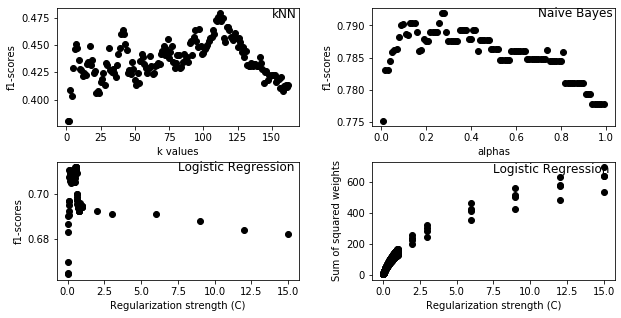

In [5]:
#def P3():
    ### STUDENT START ###
    
############################    
# 1. Transform the training and development data to matrices of word unigram feature vectors.
print("-"*80,
      "\n",
      "Transform the training and development data to matrices of word unigram feature vectors.\n")
# Convert text documents to a matrix of token counts with sparse representation
CountVect = CountVectorizer()
# Learn the training data vocabulary dictionary and return term-document matrix.
FeatureVectors_TD = CountVect.fit_transform(train_data)   
# Transform documents to document-term matrix.
FeatureVectors_DD = CountVect.transform(dev_data)  

############################
# 2. kNN
''' Produce several k-Nearest Neighbors models by varying k,\
 including one with k set to optimize f1 score. \
 For each model, show the k value and f1 score.'''
# Format output with dashes
print("-"*40,
      "\n",
      "1) k-Nearest Neighbors Models with varying k")
print("-"*40)

# Initialize empty list in which to store k values
k_values = []
# Initialize empty list for f1 scores
f1s_kNN = []
# For each value of k in the k-Nearest Neighbor (k-NN) classifier
for k in range(1, int(FeatureVectors_TD.shape[1]**(1/2))):
    # Store k values
    k_values.append(k)
    # Train each k-NN model with the current value of k, 1, 3, 5, 7, or 9
    kNN = KNeighborsClassifier(n_neighbors=k) # model object
    # Fit model with mini train data
    kNN.fit(FeatureVectors_TD, train_labels)   
    
    # Predicted labels
    PredictedLabels_DD = kNN.predict(FeatureVectors_DD)
    # F1 scores
    f1s_kNN.append(metrics.f1_score(y_true=dev_labels,
                     y_pred=PredictedLabels_DD,
                     average="weighted"))

# Plot f1 scores as a function of k values
# Plot size
plt.figure(figsize=(10,5))
plt.figure(1)
# Plot
plt.subplot(221)
# Scatterplot
plt.plot(k_values, f1s_kNN, 'o', color='black')
# Axes
plt.xlabel('k values')
plt.ylabel('f1-scores')
# Label
plt.text(150, 0.475, "kNN", fontsize=12)
 
# Identify k with the best f1-score
p = int(np.argmax(f1s_kNN))
print(" - k={0} achieved the highest f1-score of {1:.4f}\n"\
      .format(k_values[p],
      f1s_kNN[p]))

############################
# 3. Naive Bayes
'''Produce several Naive Bayes models by varying smoothing (alpha),
including one with alpha set approximately to optimize f1 score.
For each model, show the alpha value and f1 score..'''
# Format output with dashes
print("-"*40,
      "\n",
      "2) Naive Bayes Models with varying alpha")
print("-"*40)

# Initialize empty list in which to store alphas
alphas = []
# Initialize empty list for f1 scores
f1s_NB = []
# For each value of alpha
for a in np.concatenate([np.arange(0.01,1,0.01)]):
    # Store alpha
    alphas.append(a)
    # Make a Gaussian Naive Bayes model object
    NB = MultinomialNB(alpha = a)
    # Fit a Gaussian Naive Bayes model
    NB.fit(FeatureVectors_TD, train_labels)
    
    # Predicted labels
    PredictedLabels_DD = NB.predict(FeatureVectors_DD)
    # F1 scores
    f1s_NB.append(metrics.f1_score(y_true=dev_labels,
                     y_pred=PredictedLabels_DD,
                     average="weighted"))

# Plot f1 scores as a function of alphas
# Plot
plt.subplot(222)
# Scatterplot
plt.plot(alphas, f1s_NB, 'o', color='black')
# Axes
plt.xlabel('alphas')
plt.ylabel('f1-scores')
# Label
plt.text(0.70, 0.7913, "Naive Bayes", fontsize=12)

# Identify alpha with the best f1-score
p = int(np.argmax(f1s_NB))
print(" - alpha={0:.3f} achieved the highest f1-score of {1:.5f}\n"\
      .format(alphas[p],
      f1s_NB[p]))

############################
# 4. Logistic Regression
'''Produce several Logistic Regression models by varying L2 regularization strength (C),
including one with C set approximately to optimize f1 score.
For each model, show the C value, f1 score, and sum of squared weights for each topic'''
# Format output with dashes
print("-"*40,
      "\n",
      "3) Logistic Regression models with varying L2 regularization strength(C)")
print("-"*40)

# Initialize empty list in which to store C
Cs = []
# Initialize empty list for f1 scores
f1s_LR = []
# Initialize empty list for sum of squared weights
SSWs = []
# For each value of C in space of potential C values
for c in np.concatenate([np.arange(0.01,1,0.01),np.arange(1,3,1),np.arange(3,16,3)]):
    # Store Cs
    Cs.append(c)
    # Make a Logistic regression model object
    LR = LogisticRegression(penalty = 'l2',
                            C = c,
                            solver="liblinear", 
                            multi_class="auto")
    # Fit a logistic regression model
    LR.fit(FeatureVectors_TD, train_labels)
    # Sum of squared weights
    SSWs.append(np.square(LR.coef_).sum(axis=1))

    # Predicted labels
    PredictedLabels_DD = LR.predict(FeatureVectors_DD)
    # F1 scores
    f1s_LR.append(metrics.f1_score(y_true=dev_labels,
                     y_pred=PredictedLabels_DD,
                     average="weighted"))

# Plot f1 scores as a function of Cs
# Plot
plt.subplot(223)
# Scatterplot
plt.plot(Cs, f1s_LR, 'o', color='black')
# Axes
plt.xlabel('Regularization strength (C)')
plt.ylabel('f1-scores')
# Label
plt.text(7.5, 0.71, "Logistic Regression", fontsize=12)
#
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Plot sum of squared weights as a function of Cs
# Plot
plt.subplot(224)
# Scatterplot
plt.plot(Cs, SSWs, 'o', color='black')
# Axes
plt.xlabel('Regularization strength (C)')
plt.ylabel('Sum of squared weights')
# Label
plt.text(7.5, 660, "Logistic Regression", fontsize=12)

# Identify C with the best f1-score
p = int(np.argmax(f1s_LR))
print(" - C={0:.3f} achieved the highest f1-score of {1:.5f}\n"\
      .format(Cs[p],
      f1s_LR[p]))

# Sum of squared weights for each topic
# Convert list to array
SSW = np.array(SSWs)
# Print
print(" - The sum of squared weights, when c = {0}, for topic:\n\t \
        {1} = {2}\n\t \
        {3} = {4}\n\t \
        {5} = {6}\n\t \
        {7} = {8}\n\t"\
      .format(Cs[p],
             newsgroups_train.target_names[0],SSW[p,0],
             newsgroups_train.target_names[1],SSW[p,1],
             newsgroups_train.target_names[2],SSW[p,2],
             newsgroups_train.target_names[3],SSW[p,3]))


# GRID SEARCH METHOD
# # Initialize list for different k values, k
# k_values = {'k': [i for i in range(1, int(len(train_data)**(1/2)))]}
# # Exhaustive search object for different values of alpha
# kNN = GridSearchCV(KNeighborsClassifier(), param_grid=k_values, scoring='f1_macro')
# # Fit models
# kNN.fit(FeatureVectors_TD, train_labels)
    ### STUDENT END ###

# P3()

ANSWER:

**4) Why doesn't k-Nearest Neighbors work well for this problem?**
- k nearest-neighbors models assign class memberships based on majority vote and proximity to the k nearest-neighbors. This logic works well for some problems, but not for all. I think there are a number of problems:
    - There are a diversity of words or *n*-grams that are shared between all topics: for example, prepositions like "to", "of" "in", and "for" are very common across topics. More importantly, these words that are agnostic to the category and occurr frequently are assigned the same *weight* as words with more signal/meaning that occurr less frequently, like "religon", "space", "NASA" or "computer". This seems like a problem. Frequent and mostly meanless words are weighted the same as infrequent and meaningful words. A solution, therefore, could be to assign less weight to frequent and mostly meaningless words than infrequent and mostly meaningful words. 
    - The low f1-score is likley a symptom of the curse of dimensionality. For kNN, the dimensionality of the space is defined by the number of features. For these data there is a discrepancy between the diversity of words or *n*-grams observed in the training vs testing set. This matters because kNN assumes that similar points in space share similar labels. Plus the feature space for these data is large and sparse. Ultimately, this means that the distance between an observation to be predicted and its nearest neighbors is equidistance. This could probably be resolved by a combination of dimensionality reduction and feature extraction. For example, maybe principal coordinates analysis would do the trick?

**5) Why doesn't Logistic Regression work as well as Naive Bayes does?**
- The difference in f1-scores could be explained by a variety of factors.
    - Firstly, under conditions when training data sizes approach $\infty$, Logistic Regression performs better than Naive Bayes (http://ai.stanford.edu/~ang/papers/nips01-discriminativegenerative.pdf). The difference between what is expected with large training sets and what we observed will be the subject of further discussion below.
    - Under more realistic conditions, both models excel in different contexts. Logistic Regression is discriminative while Naive Bayes is generative.
    - Logistic Regression has more variance and lower bias than Naive Bayes. The bias of Naive bayes is introduced by violations of the conditional independence assumption- that features are independent for a given class. This assumption is likely violated for text data, where words at context dependent. Taken to the extreme, we might assume that Logistic Regression would therefore perform better than Naive Bayes- because high bias and low variance tend to (i) inflate errors when accuracy is measured with testing data and (ii) lead to underfitting. Conversely, the low bias and high variance associated with Logistic Regression generally leads to (i) smaller errors when accuracy is measured with testing data and (ii) overfitting. Together with the general observation that high variance and low bias generally equate to better predictions, the performace of Naive Bayes compared to Logistic Regression is suprising.
    - Given that our intuitions about the performances of these models are not reflected with the f1-scores, there is at least one explanation: there is too much variance and the model is too complex. More specifically, **Logistic Regression likely does not work as well as Naive Bayes because of high variance and model complexity, expressed as overfitting**. Evidence of this complexity can be seen in the diversity of features and the relatively small size of the training data. To corroborate this argument, we would predict that performance would increase with larger training data sets, especially if no/few new features were introduced.

**6) What is the relationship between logistic regression's sum of squared weights vs. C value?**
- C is the inverse of regularization strength. Thus, small values of C represent strong regularization while high values represent weaker regularization. When C is plotted as a function of the sum of the squared weights, the relationship is positive. The sum of squared weights and the importance of the features increase, almost logarithmically or as a squared function of C. As C grows, regularization becomes weaker, and features become more important for each topic. In other words, as C increases and complex models are penalized less the importance of the features and the sum of squared weights increase.

### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total).  Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

Notes:
* Train on the transformed training data.
* You can use `CountVectorizer` and its `.fit_transform` method to transform data.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `np.argsort` to get indices sorted by element value. 


 Transform the data to a matrix of word bigram feature vectors
--------------------------------------------------------------------------------


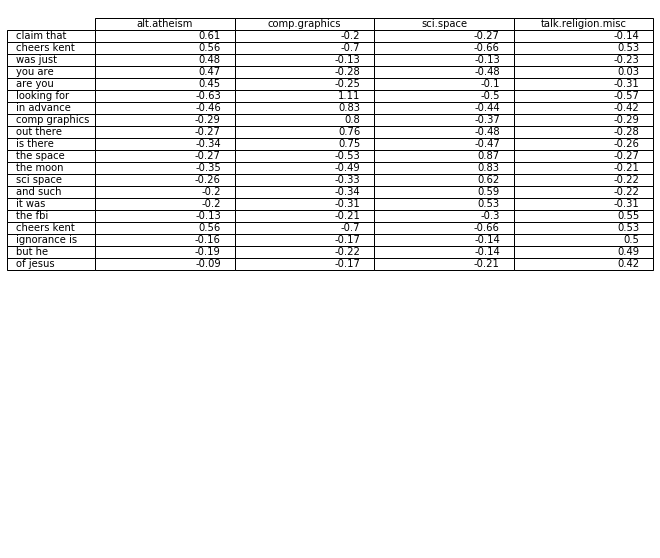

In [6]:
#def P4():
    ### STUDENT START ###
############################
# 1. Transform the data to a matrix of word bigram feature vectors
# Format output with dashes
print("\n",
      "Transform the data to a matrix of word bigram feature vectors")
print("-"*80)

# Convert text documents to a matrix of token counts with sparse representation
CountVect = CountVectorizer(analyzer='word', ngram_range=(2,2))
# Learn the vocabulary dictionary and return term-document matrix.
Bigram_FeatureVectors = CountVect.fit_transform(raw_documents=train_data)

############################
# 2. Logistic Regression
# Make a Logistic regression model object
LR = LogisticRegression(penalty='l2',
                        C=0.5, # As identified above
                        solver="liblinear", 
                        multi_class="auto")

# Fit a logistic regression model
LR.fit(Bigram_FeatureVectors, train_labels)

############################
# 3. Identify features with largest weights
# Identify the 5 features with the largest weights for each label
FiveFeatures = np.argpartition(LR.coef_, -5)[:, -5:]

# Reorder features
# for each feature, f, in the target names
for f in range(len(newsgroups_train.target_names)):
    # Reorder features from largest to smallest
    FiveFeatures[f,:] = FiveFeatures[f,
                                     np.argsort(np.take(LR.coef_[f,:],
                                                        FiveFeatures[f,:]))[::-1]]
# Flatten array into one dimension
FiveFeatures = FiveFeatures.flatten()
# Extract weights and transpose
FeatureWeights = np.take(LR.coef_, FiveFeatures, axis=1).T
# Grab Feature names
FeatureWords = CountVect.get_feature_names()

############################
# 4. Print table
# 2D array for top features
TopFeatures = np.empty(20).astype('str')
FeatureWeights = np.around(FeatureWeights, decimals=2)

# For each of the 20 features
for i in range(FiveFeatures.shape[0]):
    # Replace place holder with feature and left justify
    TopFeatures[i] = FeatureWords[FiveFeatures[i]].ljust(1)

# Plot table
plt.figure(figsize=(10, 10))
# get axes instance
ax = plt.gca()
# Make axes invisible
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axis('off')
# plot
plt.table(cellText=FeatureWeights,
                   rowLabels=TopFeatures,
                   colLabels=newsgroups_train.target_names,
                   loc='upper center')
plt.show()
    ### STUDENT END ###

#P4()

## ANSWER:
- Yes. 
- The features that are surprising to me are oddly generic and ambiguous. For example, "are you", "is there", "it was", and "but he". 
- Conversely, some of the very specific features were equally interesting. For example, "cheers kent" seems odd for both 'alt.atheism' and 'talk.religion.misc'.

### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer(preprocessor=...)` to preprocess strings with your own custom-defined function.
* `CountVectorizer` default is to preprocess strings to lower case.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.
* If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular.

In [7]:
#def better_preprocessor(s):
    ### STUDENT START ###
    
#########################
# 1. Preprocessor functions

# No preprocessing
def NoPreprocessor(t):
    # Return raw strings
    return t

# Preprocessing
def Preprocessor(t):
    # Manipulate text
    # Lower case text
    t = t.lower()
    # Replace sequences of numbers with a single token, "number"
    t = re.sub("([\d]+)", " number ", t)
    # Remove non-letter characters
    t = re.sub("[^A-Za-z0-9 \\n]", " ", t)
    # Shorten long words to <= 5
    t = re.sub("(\w{%d})\w+" % 5, "\\1", t)
    # Return string
    return t

# Convert text documents to a matrix of token counts with sparse representation
CountVect = CountVectorizer()

#########################
# 2. Logistic Regression models
# Function for results from each preprocessor
def Preprocessors(CountVect):
    # Learn the training data vocabulary dictionary and return term-document matrix.
    FeatureVectors_TD = CountVect.fit_transform(train_data)   
    # Transform documents to document-term matrix.
    FeatureVectors_DD = CountVect.transform(dev_data)  

    # Make a Logistic regression model object
    LR = LogisticRegression(C=0.5, # As identified above
                            solver="liblinear", 
                            multi_class="auto")

    # Fit a logistic regression model
    LR.fit(FeatureVectors_TD, train_labels)

    # Predicted labels
    PredictedLabels = LR.predict(FeatureVectors_DD)

    # Return f1 and dictionary size
    return [metrics.f1_score(y_true=dev_labels,
                     y_pred=PredictedLabels,
                     average="weighted"),
                FeatureVectors_TD.shape[1]]

# Invoke function
# No preprocesser
[f1s_npp, VocabSize_npp] = Preprocessors(CountVectorizer(preprocessor=NoPreprocessor))

# Amit said we could not do this
# but Stephanie said that you said we could- thank you!
    # note that without this the max is 0.7316
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as ESW

# Add stopwords
StopWords = ['acros', 'almos', 'alrea', 'altho', 'alway',
             'amoun', 'anoth', 'anyho', 'anyon', 'anyth',
             'anywa', 'anywh', 'aroun', 'becam', 'becau',
             'becom', 'befor', 'behin', 'besid', 'betwe',
             'beyon', 'botto', 'canno', 'descr', 'detai',
             'durin', 'eithe', 'eleve', 'elsew', 'enoug',
             'excep', 'fifte', 'forme', 'furth', 'herea',
             'hereb', 'herei', 'hereu', 'herse', 'himse',
             'howev', 'hundr', 'indee', 'inter', 'itsel',
             'latte', 'meanw', 'moreo', 'mostl', 'mysel',
             'namel', 'neith', 'nobod', 'nothi', 'nowhe',
             'ourse', 'perha', 'pleas', 'rathe', 'seeme',
             'seemi', 'serio', 'sever', 'shoul', 'someh',
             'someo', 'somet', 'somew', 'syste', 'thems',
             'thenc', 'thoug', 'throu', 'toget', 'towar',
             'twelv', 'twent', 'whate', 'whenc', 'whene',
             'wheth', 'whith', 'whoev', 'withi', 'witho'] + list(ESW)
# Preprocessor
[f1s_pp, VocabSize_pp] = Preprocessors(CountVectorizer(preprocessor=Preprocessor,
                                                       stop_words=StopWords))    

#########################
# 3. Logistic Regression model with preprocessing
'''Produce an improved Logistic Regression model by preprocessing the text.
Evaluate and show its f1 score and size of the vocabulary.
Try for an improvement in f1 score of at least 0.02.'''
# Format output with dashes
print("\n",
      "Logistic Regression without preprocessing")
print("-"*80) 

# Print f1 and dictionary size
print(" - The f1-score is {0:.4f} and the vocabulary is comprised of {1} words".\
     format(f1s_npp, VocabSize_npp))
 
#########################
# 4. Logistic Regression model with preprocessing
'''Produce an improved Logistic Regression model by preprocessing the text.
Evaluate and show its f1 score and size of the vocabulary.
Try for an improvement in f1 score of at least 0.02.'''
# Format output with dashes
print("\n",
      "Logistic Regression with preprocessing")
print("-"*80)

# Print f1 and dictionary size
print(" - The f1-score is {0:.4f} and the vocabulary is comprised of {1} words".\
     format(f1s_pp, VocabSize_pp))

#########################
# 5. The differences
# Format output with dashes
print("\n",
      "The Differences")
print("-"*80)
# Print the difference in f1-scores
print(" - The f1-score is {0:.4f} larger with preprocessed data than with 'no-preprocessing'\
        (the preprocessing CountVectorizer() does by default)".\
     format(f1s_pp-f1s_npp))

# Print the difference in dictionary sizes
print(" - The dictionary is {0:.2f}% or {1} words smaller with preprocessing".\
     format(((VocabSize_npp-VocabSize_pp)/(VocabSize_npp))*100,
           (VocabSize_npp-VocabSize_pp)))


    ### STUDENT END ###

#def P5():
    ### STUDENT START ###
    
    
    ### STUDENT END ###

# P5()


 Logistic Regression without preprocessing
--------------------------------------------------------------------------------
 - The f1-score is 0.7069 and the vocabulary is comprised of 33291 words

 Logistic Regression with preprocessing
--------------------------------------------------------------------------------
 - The f1-score is 0.7376 and the vocabulary is comprised of 14049 words

 The Differences
--------------------------------------------------------------------------------
 - The f1-score is 0.0307 larger with preprocessed data than with 'no-preprocessing'        (the preprocessing CountVectorizer() does by default)
 - The dictionary is 57.80% or 19242 words smaller with preprocessing


### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Notes:
* You can use `LogisticRegression(..., penalty="l1")` to produce a logistic regression model using L1 regularization.
* You can use `LogisticRegression(..., penalty="l2")` to produce a logistic regression model using L2 regularization.
* You can use `LogisticRegression(..., tol=0.015)` to produce a logistic regression model using relaxed gradient descent convergence criteria.  The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- The highest f1-score, 0.7052, is achieved when the vocabulary size is 212 and regularization strength (C) is 0.10


,C,Vocab_Size,F1-score
0,0.000500,1,0.229716
1,0.001000,3,0.333569
2,0.005000,12,0.432305
3,0.010000,17,0.463853
4,0.050000,121,0.635985
5,0.100000,212,0.705151
6,0.500000,793,0.670291
7,1.000000,1105,0.675295
8,2.000000,1698,0.689170
9,3.000000,1941,0.690282


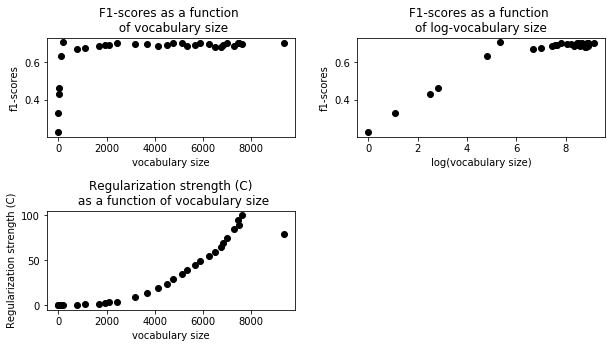

In [8]:
#def P6():
# Keep this random seed here to make comparison easier.
np.random.seed(0)
    
    ### STUDENT START ###
#########################
# 1. Logistic Regression model with l1 regularization
'''Produce a Logistic Regression model using the L1 regularization strength.
Reduce the vocabulary to only those features that have at least one non-zero weight.
Produce a new Logistic Regression model using the reduced vocabulary
and L2 regularization strength of 0.5.
Evaluate and show the L1 regularization strength, vocabulary size,
and f1 score associated with the new model.'''
# Define various values of C (regularization strength)
C = np.concatenate([np.array([0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4]),
                        np.linspace(4,100,20)])
# Initialize 2D array for vocab size
VocabN = [0] * len(C)
# = np.zeros(len(C)).astype('u4')
# Initialize 2D array for f1 scores
f1Scores = []
# Initialize 2D array for non-zero weights
NonZeroWeights = np.zeros(len(C)).astype('u4')

# Fit models and extract vocab size, f1 scores, and non-zero weights
for m in range(len(C)):
    # Convert text documents to a matrix of token counts with sparse representation
    CountVect = CountVectorizer()
    # Learn the training data vocabulary dictionary and return term-document matrix.
    FeatureVectors_TD = CountVect.fit_transform(train_data)   
    # Transform documents to document-term matrix.
    FeatureVectors_DD = CountVect.transform(dev_data)  
    
    # Make a Logistic regression model object
    LR_l1 = LogisticRegression(penalty='l1',
                            C=C[m], 
                            solver="liblinear",
                            multi_class="auto",
#                             max_iter=300,
                            tol=0.015)
    # Fit a logistic regression model
    LR_l1.fit(FeatureVectors_TD, train_labels)   
    
#########################
# 2. Count non-zero weights and subset non-zero weights
    
    # Count the number of non-zero values down the columns, axis = 0
    VocabN[m] = np.count_nonzero(np.apply_along_axis(np.count_nonzero,0,LR_l1.coef_))
    
    # Count the number of non-zero values down the columns, axis = 0
    NonZeroWeights[m] = np.apply_along_axis(np.count_nonzero,
                                             0,
                                             LR_l1.coef_).sum()
    # Grab non-zero weights
    NZWs = (LR_l1.coef_ != 0)
    
    # Keep features with at least one non-zero weight for at least one class
    NZW_Features = NZWs.any(axis=0)
    
##########################
# 3. Prune, and fit Logistic Regression model with l2 regularization  
        
    # Prune training data
    PrunedFeatureVectors_TD = FeatureVectors_TD[:, NZW_Features]
    # Prune dev data
    PrunedFeatureVectors_DD = FeatureVectors_DD[:, NZW_Features]
    
    # Make a Logistic regression model object
    LR_l2 = LogisticRegression(penalty='l2',
                            C=0.5, 
                            solver="liblinear",
                            multi_class="auto",
                            tol=0.015)
    
    # Fit model with pruned features
    LR_l2.fit(PrunedFeatureVectors_TD, train_labels)
    
    # Predicted labels to compute f1-scores
    PrunedPredictions = LR_l2.predict(PrunedFeatureVectors_DD)
    
    # Compute f1-scores
    f1Scores.append(metrics.f1_score(y_true=dev_labels,
                                     y_pred=PrunedPredictions,
                                     average="weighted"))
    

##########################
# 4. Plot Data
# Size
plt.figure(figsize=(10,5))
# Plot f1 scores as a function of vocab size
# Plot
plt.subplot(221)
# Scatterplot
plt.plot(VocabN, f1Scores, 'o', color='black')
# Axes
plt.xlabel('vocabulary size')
plt.ylabel('f1-scores')
# Title
plt.title('F1-scores as a function \n of vocabulary size')
# Spaces between plots
plt.subplots_adjust(hspace=0.75, wspace=0.25);

# Plot f1 scores as a function of log vocab size
# Plot
plt.subplot(222)
# Scatterplot
plt.plot(np.log(VocabN), f1Scores, 'o', color='black')
# Axes
plt.xlabel('log(vocabulary size)')
plt.ylabel('f1-scores')
# Title
plt.title('F1-scores as a function \nof log-vocabulary size')

# Plot l1 regularization strength vs vocabulary size
# Plot
plt.subplot(223)
# Scatterplot
plt.plot(VocabN, C, 'o', color='black')
# Axes
plt.xlabel('vocabulary size')
plt.ylabel('Regularization strength (C)')
# Title
plt.title('Regularization strength (C)\n as a function of vocabulary size');

##########################
# 4. Summary
p = np.argmax(f1Scores)
print("- The highest f1-score, {0:.4f},\
 is achieved when the vocabulary size is {1}\
 and regularization strength (C) is {2:.2f}".\
      format(np.amax(f1Scores),
             VocabN[p],
             C[p]))

##########################
# 5. Tabulate data
import pandas as pd
# data
df = {'C': C, 
      'Vocab_Size': VocabN,
      'F1-score': f1Scores}
# Table
df = pd.DataFrame(data=df)
# Print
df
    ### STUDENT END ###

#P6()

ANSWER: 
- This is very interesting! Model performance, expressed here as the f1-score, is maximized at 0.705 when the vocabulary size is 212 and regularization strength is C = 0.10. 
- That said, the f1-scores plateau around 0.705 when the vocabulary size is only 212 words and C=0.1 (it reaches 0.63 when the vocabulary size is 121 and C=0.5).
- $\therefore$ models with reduced vocabularies containing only 121-212 words perform similarly to those with up to 7637 words.

### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Note:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

The f1-score of the model fitted with tf-idf data is 0.76.


The top 3 documents with the highest R-ratios:
--------------------------------------------------------------------------------
The 216th document has a R-ratio = 929.36
- The predicted label, with a probability = 0.99, was: comp.graphics
- While the correct label, with a probability = 0.0011, was: talk.religion.misc

I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit en

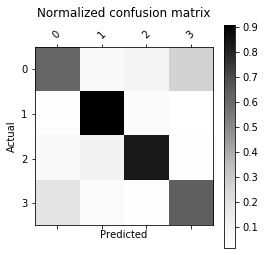

In [9]:
#def P7():
    ### STUDENT START ###
    
#########################
# 1. Convert a collection of raw documents
 # to a matrix of TF-IDF (Term-frequency times inverse document-frequency) features.
    # This is equivalent to CountVectorizer followed by TfidfTransformer.
    # In other words: 
        # First, transforms text into a sparse matrix of n-gram counts (CountVectorizer).
        # Second, performs the TF-IDF transformation from a provided matrix of counts (TfidfTransformer).
TFxIDF = TfidfVectorizer()
# Learn the training data vocabulary dictionary and return term-document matrix.
FeatureVectors_TD = TFxIDF.fit_transform(raw_documents=train_data)

#########################
# 2. Make a Logistic regression model object
LR = LogisticRegression(penalty='l2',
                        C=100, 
                        solver="liblinear",
                        multi_class="auto")
# Fit a logistic regression model
LR.fit(FeatureVectors_TD, train_labels)   
# Transform documents to document-term matrix.
FeatureVectors_DD = TFxIDF.transform(dev_data) 
# Predicted labels 
PredictedLabels = LR.predict(FeatureVectors_DD)
# F1-score
print("The f1-score of the model fitted with tf-idf data is {0:.2f}.\n\n".
     format(metrics.f1_score(y_true=dev_labels,
                             y_pred=PredictedLabels,
                             average="weighted")))

#########################
# 3. Compute R-ratio
# Predicted probabilities for R-ratio
PredProbs = LR.predict_proba(FeatureVectors_DD)
# Maximum predicted probability for R-ratio
MaxPredProbs = PredProbs.max(axis=1)
# The predicted probability of correct labels
PredProbCorrectLab = np.array([PredProbs[i, j] for i, j in
                               zip(range(len(dev_labels)),
                                   dev_labels)])
# R-ratio = maximum predicted probability / predicted probability of correct label
R = MaxPredProbs / PredProbCorrectLab

# The top 3 documents with the highest R-ratio
Top3docs = np.argpartition(R, -3)[-3:]
# The top 3 documents with the highest R-ratio in descending order
Top3docs = Top3docs[np.argsort(R[Top3docs])][::-1]

# Print top 3 documents
print("The top 3 documents with the highest R-ratios:")
# For each elemement in the documents with the highest r-ratio, count the iterable
for i, j in enumerate(Top3docs):
    # Print a divider for each of the top documents
    print('-'* 80)
    # Print the index of the document and its R-ratio
    print('The {0}th document has a R-ratio = {1:.2f}'\
          .format(j+1, R[j]))
    # Print the predicted label and the probability with which it was assigned
    print('- The predicted label, with a probability = {0:.2f}, was: {1}'.\
        format(MaxPredProbs[j],
               newsgroups_train.target_names[PredProbs[j,:].argmax()]))
    # Print the correct label and the probability with which it was assigned
    print('- While the correct label, with a probability = {0:.4f}, was: {1}\n'.\
        format(PredProbs[j, dev_labels[j]],
               newsgroups_train.target_names[dev_labels[j]]))
    
    # Print the actual document text
    print(dev_data[j])

    
#########################
# 4. Misclassifications
# Confusion matrix
CM = confusion_matrix(y_true=dev_labels,
                      y_pred=PredictedLabels)

# Print
# Normalized confusion matrix
print('-'* 80)
print("What kinds of mistakes is the model making? See the normalized confusion matrix and the response below.")
NCM = [i/np.sum(CM, axis = 1) for i in CM]
# Convert to array
NCM = np.array(NCM)
# Matrix
np.set_printoptions(precision=2)
print(NCM)

# Visualize normalized confusion matrix
plt.matshow(NCM, cmap='Greys') # imshow
plt.title("Normalized confusion matrix\n")
plt.colorbar()
tick_marks = np.arange(len(NCM))
plt.xticks(tick_marks, range(0,4), rotation=45)
plt.yticks(tick_marks, range(0,4))
plt.xlabel('Predicted')
plt.ylabel('Actual');

# # Transform dev_data into array
# DevData = np.array(dev_data)
# # Misclassified text with large R-ratios
# Misses = DevData[(PredictedLabels != dev_labels) &\
#                  (R>100) &
#                  ((dev_labels == 0) & (PredictedLabels == 3))]
# # Print the misses
# print('-'*80)
# # Print cleaned text
# for m in Misses:
#     print(m)

    ### STUDENT END ###

#P7()

ANSWER:

**How is `TfidfVectorizer` different than `CountVectorizer`?**
-  Firstly, `CountVectorizer` both tokenizes strings and counts occurrences of tokens/words. This process generally, if not always, results in data that is saturated with frequent words that are common to all classes and carry little information/meaning/signal needed to distinguish classes (e.g. pronouns, prepositions, and conjunctions). This approach leads to a data set that is biased towards the most frequent words, regardless of the amount of information that contain. Likewise, rarer, but potentially more meaningful words (e.g. 'atheism', 'computer', 'mary', etc) are shadowed because they are infrequent.

- `TfidfVectorizer`resolves this problem by re-weighting the feature counts, thereby penalizing frequent words, with the term-frequency times inverse document-frequency transformation (tfidf). Tfidf therefore weights word counts by their frequency. This transformation assigns less weight to common words than rarer words.

- Ultimately, the difference between the two vectorizers is that while `CountVectorizer` simply counts occurrences of words, `TfidfVectorizer` transforms the word frequencies first, via tfidf, assigns less weight to frequent words, more weight to rare words, and thereby generally achieves higher accuracy than `CountVectorizer`. Of course, performance may not always be greater for `TfidfVectorizer` than `CountVectorizer` as we can imagine cases with very small feature sets where they produce similar accuracies.


**Explain what the R ratio describes.**

- Essentially, the R-ratio describes a relationship between the predicted vs correct labels. Two edge cases arise from this relationship. When the maximimum predicted probability is close or equal to the predicted probability of the correct label, the R-ratio should be small and close to 1. Conversely, when the maximum predicted probability is high, say close to 1, but the predicted probability of correct label is low, say < 0.01, the R-ratio grows as the numerator increases and the denominator shrinks. The R-ratio is also 1-accuracy when R > 1 or the percentage of incorrectly predicted labels. In other words the R-ratio is high when there is a large difference between the predicted probability of the correct label and the maximum predicted probability. Thus, classes/labels with high R-ratios deserve extra attention and should be investigated to identify systematic bias in the algorithm.

**What kinds of mistakes is the model making?** 
- The model is making a couple types of mistakes. As shown in the confusion matrix, there are three main mistakes:
    - The model is misclassifying text about 'alt.atheism' as text about 'talk.religion.misc'. This is most common mistake. Of those texts about 'alt.atheism' $26$% are misclassified with a 'talk.religion.misc' label.
    - The model is also misclassifying text about 'talk.religion.misc' as text about 'alt.atheism'. This is a less common mistake. Of those texts about 'talk.religion.misc' $19$% are misclassified with a 'alt.atheism' label.
    - Lastly, the model is misclassigying text about 'sci.space' as text about 'comp.graphics'. This mistake is not common. Of those texts about 'sci.space' only about $11$% were misclassified with a 'comp.graphics' label.
- These first two mistakes are reasonable since both topics are about religious faith or the lack thereof. Likewise, the last mistake is reasonable since both topics contain feature vectors about computers.

**Suggest a way to address one particular issue that you see.**
- For a solution to the misclassification problems observed above, there are a couple solutions. For simplicity I will focus on the most problematic ans systemic issue: the misclassification of text about 'alt.atheism' as text about 'talk.religion.misc'. For this problem, I think feature engineering offers the most promising solutions.
    - Differential weighting: perhaps we could assign more weights to words that only occur in 'alt.athesism' or 'talk.religion.misc' than words that co-occur in both groups. This solution might enable the model to discriminate between these two classes better than at present.
    - Principal component analysis (PCA): if we use PCA to reduce the dimensionality of the data by generation of linear combinations of the features we might enhance model performance and reduce misclassifications. This might also resolve other problems encountered above. Lastly, it would also comprimise interpretability since the features would be comprised of linear combinations of words.  
    - Larger n-grams: if we use larger n-grams, we would add context for each feature. For example, while 'cheers kent' was an important bi-gram for both 'alt.athesism' and 'talk.religion.misc' it is unlikely that the two classes will share salient features comprised of strings of >2 of words. Thus, this approach might increase accuracy.
    - Exhaustive stop-word list: if we implement an exhaustive list of stop words we might not only reduce the dimensionality of the data but also increase model performance.


### Part 8 EXTRA CREDIT:

Produce a Logistic Regression model to implement your suggestion from Part 7.

In [17]:
# Exahaustive list of stop words included.

#########################
# Preprocessing
def Preprocessor(t):
    # Manipulate text
    # Lower case text
    t = t.lower()
    # Replace sequences of numbers with a single token, "number"
    t = re.sub("([\d]+)", " number ", t)
    # Remove non-letter characters
    t = re.sub("[^A-Za-z0-9 \\n]", " ", t)
    # Shorten long words to <= 5
    t = re.sub("(\w{%d})\w+" % 5, "\\1", t)
    # Return string
    return t

# Convert text documents to a matrix of token counts with sparse representation
CountVect = CountVectorizer()

# F1scores
F1Scores = []
#########################
# 2. Logistic Regression models
# Function for results from each preprocessor
def Preprocessors(CountVect):

    # Learn the training data vocabulary dictionary and return term-document matrix.
    FeatureVectors_TD = CountVect.fit_transform(train_data)   
    # Transform documents to document-term matrix.
    FeatureVectors_DD = CountVect.transform(dev_data)  

    # Make a Logistic regression model object
    LR = LogisticRegression(C=0.5, # As identified above
                            penalty='l2',
                            solver="liblinear", 
                            multi_class="auto")

    # Fit a logistic regression model
    LR.fit(FeatureVectors_TD, train_labels)

    # Predicted labels
    PredictedLabels = LR.predict(FeatureVectors_DD)

    # Return f1 and dictionary size
    return [metrics.f1_score(y_true=dev_labels,
                     y_pred=PredictedLabels,
                     average="weighted"),
                FeatureVectors_TD.shape[1]]


# Amit said we could not do this
# but Stephanie said that you said we could- thank you!
    # note that without this the max is 0.7316
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as ESW
from nltk.corpus import stopwords as SW

# Add stopwords
StopWords = ['acros', 'almos', 'alrea', 'altho', 'alway',
             'amoun', 'anoth', 'anyho', 'anyon', 'anyth',
             'anywa', 'anywh', 'aroun', 'becam', 'becau',
             'becom', 'befor', 'behin', 'besid', 'betwe',
             'beyon', 'botto', 'canno', 'descr', 'detai',
             'durin', 'eithe', 'eleve', 'elsew', 'enoug',
             'excep', 'fifte', 'forme', 'furth', 'herea',
             'hereb', 'herei', 'hereu', 'herse', 'himse',
             'howev', 'hundr', 'indee', 'inter', 'itsel',
             'latte', 'meanw', 'moreo', 'mostl', 'mysel',
             'namel', 'neith', 'nobod', 'nothi', 'nowhe',
             'ourse', 'perha', 'pleas', 'rathe', 'seeme',
             'seemi', 'serio', 'sever', 'shoul', 'someh',
             'someo', 'somet', 'somew', 'syste', 'thems',
             'thenc', 'thoug', 'throu', 'toget', 'towar',
             'twelv', 'twent', 'whate', 'whenc', 'whene',
             'wheth', 'whith', 'whoev', 'withi', 'witho',
             'a', "about", "above", "after", "again",
             "against", "ain", "all", "am", "an", "and",
             "any", "are", "aren", "aren't", "as", "at",
             "be", "because", "been", "before", "being",
             "below", "between", "both", "but", "by",
             "can", "couldn", "couldn't", "d", "did",
             "didn", "didn't", "do", "does", "doesn",
             "doesn't", "doing", "don", "don't",
             "down", "during", "each", "few", "for",
             "from", "further", "had", "hadn",
             "hadn't", "has", "hasn", "hasn't",
             "have", "haven", "haven't", "having", 
             "he", "her", "here", "hers", "herself",
             "him", "himself", "his", "how", "i", "if",
             "in", "into", "is", "isn", "isn't", "it",
             "it's", "its", "itself", "just", "ll", "m",
             "ma", "me", "mightn", "mightn't", "more",
             "most", "mustn", "mustn't", "my", "myself",
             "needn", "needn't", "no", "nor", "not", "now",
             "o", "of", "off", "on", "once", "only", "or",
             "other", "our", "ours", "ourselves", "out",
             "over", "own", "re", "s", "same", "shan", "shan't",
             "she", "she's", "should", "should've", "shouldn",
             "shouldn't", "so", "some", "such", "t", "than",
             "that", "that'll", "the", "their", "theirs", "them",
             "themselves", "then", "there", "these", "they",
             "this", "those", "through", "to", "too", "under", "until",
             "up", "ve", "very", "was", "wasn", "wasn't", "we", "were",
             "weren", "weren't", "what", "when", "where", "which",
             "while", "who", "whom", "why", "will", "with", "won",
             "won't", "wouldn", "wouldn't", "y", "you", "you'd",
             "you'll", "you're", "you've", "your", "yours", "yourself",
             "yourselves", "could", "he'd", "he'll", "he's", "here's", 
             "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought",
             "she'd", "she'll", "that's", "there's", "they'd", "they'll",
             "they're", "they've", "we'd", "we'll", "we're", "we've",
             "what's", "when's", "where's", "who's", "why's", "would",
             'havin', 'let'] + list(ESW)

stopwords = SW.words('english')+list(StopWords)

# Preprocessor
[f1s_pp, VocabSize_pp] = Preprocessors(CountVectorizer(preprocessor=Preprocessor,
                                                       stop_words=stopwords))    

# Print f1 and dictionary size
print(" - The f1-score is {0:.4f} and the vocabulary is comprised of {1} words".\
     format(f1s_pp, VocabSize_pp))
 



 - The f1-score is 0.7451 and the vocabulary is comprised of 14026 words
